# Plots with confidence interval

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval


parameters = json.load(open("parameters.json"))

n_omegas = parameters["n_omegas"]
n_thetas = parameters["n_thetas"]
n_simulations = parameters["n_simulations"]
max_bellman_iterations = 8
max_bellman_iterations_validation = max_bellman_iterations + 10
seeds = range(1, 21)
n_seeds = len(seeds)
ticks_freq = 2 if max_bellman_iterations == 8 else 5
dt = 0.01

## General case

### Extract data

In [2]:
fqi_metrics = np.zeros((n_seeds, max_bellman_iterations + 1, n_simulations, 2))

for idx_seed, seed in enumerate(seeds):
    fqi_metrics[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_metrics_{seed}.npy")

pbo_linear_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 2, n_simulations, 2))

for idx_seed, seed in enumerate(seeds):
    pbo_linear_metrics[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_metrics_{seed}.npy")

pbo_linear_max_linear_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 1, n_simulations, 2))

for idx_seed, seed in enumerate(seeds):
    pbo_linear_max_linear_metrics[idx_seed] = np.load(f"figures/data/PBO_linear_max_linear/{max_bellman_iterations}_metrics_{seed}.npy")

### Number of seconds archieved

In [3]:
fqi_seconds_mean = (fqi_metrics[:, :, :, 0] * dt).mean(axis=2).mean(axis=0)
fqi_seconds_std = (fqi_metrics[:, :, :, 0] * dt).mean(axis=2).std(axis=0)
fqi_seconds_confidence_interval = confidence_interval(fqi_seconds_mean, fqi_seconds_std, n_seeds)

pbo_linear_seconds_mean = (pbo_linear_metrics[:, :, :, 0] * dt).mean(axis=2).mean(axis=0)
pbo_linear_seconds_std = (pbo_linear_metrics[:, :, :, 0] * dt).mean(axis=2).std(axis=0)
pbo_linear_seconds_confidence_interval = confidence_interval(pbo_linear_seconds_mean, pbo_linear_seconds_std, n_seeds)

pbo_linear_max_linear_seconds_mean = (pbo_linear_max_linear_metrics[:, :, :, 0] * dt).mean(axis=2).mean(axis=0)
pbo_linear_max_linear_seconds_std = (pbo_linear_max_linear_metrics[:, :, :, 0] * dt).mean(axis=2).std(axis=0)
pbo_linear_max_linear_seconds_confidence_interval = confidence_interval(pbo_linear_max_linear_seconds_mean, pbo_linear_max_linear_seconds_std, n_seeds)

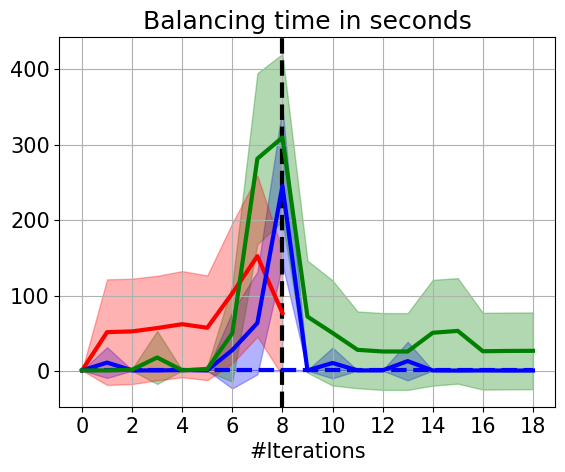

In [4]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_linear_seconds_mean[:-1], label="PBO linear", color="blue", zorder=7)
plt.fill_between(iterations_validation, pbo_linear_seconds_confidence_interval[0, :-1], pbo_linear_seconds_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_seconds_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="PBO linear fixed point", zorder=3)
plt.fill_between(iterations_validation, pbo_linear_seconds_confidence_interval[0, -1], pbo_linear_seconds_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_linear_max_linear_seconds_mean, label="PBO deep", color="green", zorder=8)
plt.fill_between(iterations_validation, pbo_linear_max_linear_seconds_confidence_interval[0], pbo_linear_max_linear_seconds_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_seconds_mean, label="FQI", color="red", zorder=6)
plt.fill_between(iterations, fqi_seconds_confidence_interval[0], fqi_seconds_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("Balancing time in seconds")
# plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/seconds_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Performance

In [5]:
fqi_performances_mean = (fqi_metrics[:, :, :, 1]).mean(axis=2).mean(axis=0)
fqi_performances_std = (fqi_metrics[:, :, :, 1]).mean(axis=2).std(axis=0)
fqi_performances_confidence_interval = confidence_interval(fqi_performances_mean, fqi_performances_std, n_seeds)

pbo_linear_performances_mean = (pbo_linear_metrics[:, :, :, 1]).mean(axis=2).mean(axis=0)
pbo_linear_performances_std = (pbo_linear_metrics[:, :, :, 1]).mean(axis=2).std(axis=0)
pbo_linear_performances_confidence_interval = confidence_interval(pbo_linear_performances_mean, pbo_linear_performances_std, n_seeds)

pbo_linear_max_linear_performances_mean = (pbo_linear_max_linear_metrics[:, :, :, 1]).mean(axis=2).mean(axis=0)
pbo_linear_max_linear_performances_std = (pbo_linear_max_linear_metrics[:, :, :, 1]).mean(axis=2).std(axis=0)
pbo_linear_max_linear_performances_confidence_interval = confidence_interval(pbo_linear_max_linear_performances_mean, pbo_linear_max_linear_performances_std, n_seeds)

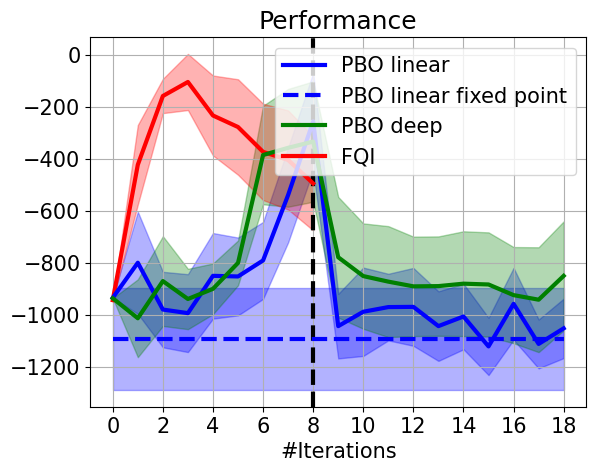

In [6]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_linear_performances_mean[:-1], label="PBO linear", color="blue", zorder=7)
plt.fill_between(iterations_validation, pbo_linear_performances_confidence_interval[0, :-1], pbo_linear_performances_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_performances_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="PBO linear fixed point", zorder=3)
plt.fill_between(iterations_validation, pbo_linear_performances_confidence_interval[0, -1], pbo_linear_performances_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_linear_max_linear_performances_mean, label="PBO deep", color="green", zorder=8)
plt.fill_between(iterations_validation, pbo_linear_max_linear_performances_confidence_interval[0], pbo_linear_max_linear_performances_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_performances_mean, label="FQI", color="red", zorder=6)
plt.fill_between(iterations, fqi_performances_confidence_interval[0], fqi_performances_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("Performance")
plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/performance_{max_bellman_iterations}.pdf", bbox_inches='tight')